# Comparison between TFIDF and Sequence Method

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

### Data Import

In [2]:
with open('Model_TFIDF.json', 'r') as Model_TFIDF_File:
    tfidf_model_performance = json.load(Model_TFIDF_File)
    
with open('Model_Sequence.json', 'r') as Model_Sequence_File:
    sequence_model_performance = json.load(Model_Sequence_File)

In [3]:
tfidf_model_performance

{'Title_Accuracy': '0.7786843',
 'Title_Recall': '0.8755102',
 'Content_Accuracy': '0.8969913',
 'Content_Recall': '0.98163265',
 'Time': '76.78582525253296'}

In [4]:
sequence_model_performance

{'Title_Accuracy': '0.7491076',
 'Title_Recall': '0.9153493',
 'Content_Accuracy': '0.8954615',
 'Content_Recall': '0.9551249',
 'Time': '70.1442940235138'}

In [5]:
Time = []
Accuracy = []
Recall = []
Accuracy_tfidf = []
Recall_tfidf = []
Accuracy_sequence = []
Recall_sequence = []

for metric, value in  tfidf_model_performance.items():
    if 'Accuracy' in metric:
        Accuracy.append(metric)
        Accuracy_tfidf.append(float(value)*100)
    elif 'Recall' in metric:
        Recall.append(metric)
        Recall_tfidf.append(float(value)*100)
    else:
        Time.append(float(value))
    
for metric, value in  sequence_model_performance.items():
    if 'Accuracy' in metric:
        Accuracy_sequence.append(float(value)*100)
    elif 'Recall' in metric:
        Recall_sequence.append(float(value)*100)
    else:
        Time.append(float(value))

### Accuracy Comparison

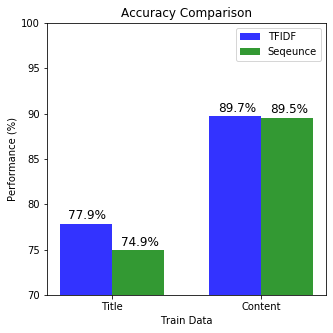

In [6]:
# create plot
fig, ax = plt.subplots(figsize=[5,5])
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

bar_tfidf = plt.bar(index, Accuracy_tfidf, bar_width, alpha=opacity, color='b', label='TFIDF')

bar_sequence = plt.bar(index + bar_width, Accuracy_sequence, bar_width, alpha=opacity, color='g', label='Seqeunce')

plt.xlabel('Train Data')
plt.xticks(index + bar_width/2, ('Title', 'Content'))

plt.ylabel('Performance (%)')
plt.ylim(70,100)

plt.title('Accuracy Comparison')
plt.legend()

for i in range(2):
    ax.text(i - bar_width/3, Accuracy_tfidf[i] + 0.5, "%.1f%%" % Accuracy_tfidf[i], fontsize=12)
    ax.text(i + bar_width*2/3, Accuracy_sequence[i] + 0.5, "%.1f%%" % Accuracy_sequence[i], fontsize=12)

plt.show()

### Recall Comparison

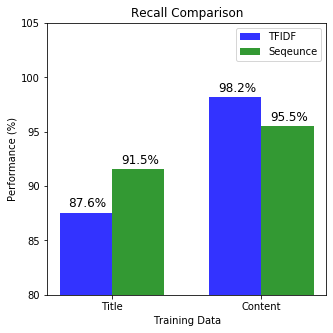

In [7]:
# create plot
fig, ax = plt.subplots(figsize=[5,5])
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

bar_tfidf = plt.bar(index, Recall_tfidf, bar_width, alpha=opacity, color='b', label='TFIDF')

bar_sequence = plt.bar(index + bar_width, Recall_sequence, bar_width, alpha=opacity, color='g', label='Seqeunce')

plt.xlabel('Training Data')
plt.xticks(index + bar_width/2, ('Title', 'Content'))

plt.ylabel('Performance (%)')
plt.ylim(80,105)

plt.title('Recall Comparison')
plt.legend()

for i in range(2):
    ax.text(i - bar_width/3, Recall_tfidf[i] + 0.5, "%.1f%%" % Recall_tfidf[i], fontsize=12)
    ax.text(i + bar_width*2/3, Recall_sequence[i] + 0.5, "%.1f%%" % Recall_sequence[i], fontsize=12)

plt.show()

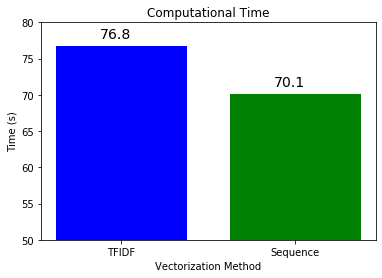

In [21]:
x_labels = ['TFIDF', 'Sequence']
y_values = [Time[0], Time[1]]

fig, ax = plt.subplots() 

plt.bar(x_labels, y_values, align='center', width = 0.75, color=['blue','green'])
plt.xlabel('Vectorization Method')
plt.ylabel('Time (s)')
plt.ylim((50, 80))
plt.title('Computational Time')

for i, v in enumerate(x_labels):
    ax.text(i-0.125, y_values[i] + 1, "%.1f"%y_values[i], fontsize=14)

plt.show()